# <center>Предсказание цен на недвижимость<center>

#### Импортируем необходимые библиотеки и настраиваем параметры для отрисовки графиков

In [1032]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

rcParams.update({'font.size': 15, 'font.family': 'Times New Roman'})
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## <center> I. Обработка данных <center>
   
0. Импорт данных
1. Изменение типов данных
2. Обработка выбросов
3. Заполнение пропущенных значений
4. One-hot-encoding на категориальных пизнаках
5. Добавление новых признаков
6. Сохранение обработанного датасета

### 0. Импорт данных

In [1033]:
data = pd.read_csv('train (1).csv')
data.sample(3)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
5546  16524          61    1.0  35.247355   19.797447            6.0      4   
9273   2776           6    1.0  38.167725         NaN            1.0      4   
3329   4543         101    2.0  49.187993   33.928154            5.0      6   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
5546         9.0       1980   0.300323         B         B        52   
9273        17.0       1977   0.243205         B         B         5   
3329         5.0       1972   0.225825         A         B        41   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
5546     10311         6           NaN            1        9       B   
9273      1564         0         540.0            0        0       B   
3329      6558         7        1548.0            3        2       B   

              Price  
5546  162550.879890  
9273  135222.744012  
3329  201571.982947

In [886]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [887]:
data.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315775    37.199645   
std     4859.01902     43.587592      0.839512     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     19.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

Данные содержат 18 столбцов __features__ и 1 столбец __Price__ - целевая переменная. Всего 10000 строк.


### <center>Описания полей датасета по недвижимости<center>


__Id__ - идентификационный номер квартиры,

#### <center>Features<center>

__DistrictId__ - идентификационный номер района,

__Rooms__ - количество комнат,

__Square__ - площадь,

__LifeSquare__ - жилая площадь,

__KitchenSquare__ - площадь кухни,

__Floor__ - этаж,

__HouseFloor__ - количество этажей в доме,

__HouseYear__ - год постройки дома,

__Ecology_1__, __Ecology_2__, __Ecology_3__ - экологические показатели местности,

__Social_1__, __Social_2__, __Social_3__ - социальные показатели местности,

__Healthcare_1__, __Helthcare_2__ - показатели местности, связанные с охраной здоровья,

__Shops_1__, __Shops_2__ - показатели, связанные с наличием магазинов, торговых центров,
 
#### <center>Target<center>

__Price__ - цена квартиры.
    
### <center>Обработка типов данных, выбросов и пропущенных значений<center>
    
#### 1. Типы данных
    
Преобразуем типы данных признаков, чтобы использовать меньше оперативной памяти
    
__float64 --> float32__
    
__int64 --> int32 --> int16 --> int8__
    
__object  --> categorial__
    
#### 2. Выбросы
    
Посмотрим ящики с усами и гистограммы данных, чтобы понять, где есть выбросы
 
#### 3. Пропущенный значения
    
Как видно из таблицы всего два признака, имеющих пропущенные значения __LifeSquare__ и __Healthcare1__
    
#### 4. __One-hot-encodin__
    
Разделим категориальные признаки на несколько столбоцов 
    
#### 5. Добавление новых признаков
    
Избавимся от линейной зависимости (сильно скоррелированных признаков) с помощью нелинейного преобразования

### 1. Изменение типов данных

In [1034]:
def change_data_type(data):
    """
    change type data to reduce using RAM
    """
    start_memory = data.memory_usage().sum() / 1024**2
    print(f'Memory usage of dataframe: {start_memory:.2f} Mb')
    
    for col in data.columns:
        col_type = data[col].dtype
        
        if col_type != object:
            c_min = data[col].min()
            c_max = data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    data[col] = data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    data[col] = data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    data[col] = data[col].astype(np.int32)
                else:
                    data[col] = data[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    data[col] = data[col].astype(np.float32)
                else:
                    data[col] = data[col].astype(np.float32)
        else:
            data[col] = data[col].astype('category')

            
    end_memory = data.memory_usage().sum() / 1024**2
    print(f'Memory usage after optimization is: {end_memory:.2f} Mb')
    print(f'Decreased by {(start_memory - end_memory) / start_memory * 100:.1f}')


In [1035]:
change_data_type(data)

Memory usage of dataframe: 1.53 Mb
Memory usage after optimization is: 0.49 Mb
Decreased by 68.1


In [890]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

Как видно, уменьшение используемой памяти уменьшилось на 68%

### 2. Обработка выбросов

In [983]:
features_arr = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2']

num_features_arr = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 
                'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 
                'Shops_1']

category_features_arr = ['Ecology_2', 'Ecology_3', 'Shops_2']

target_arr = ['Price']

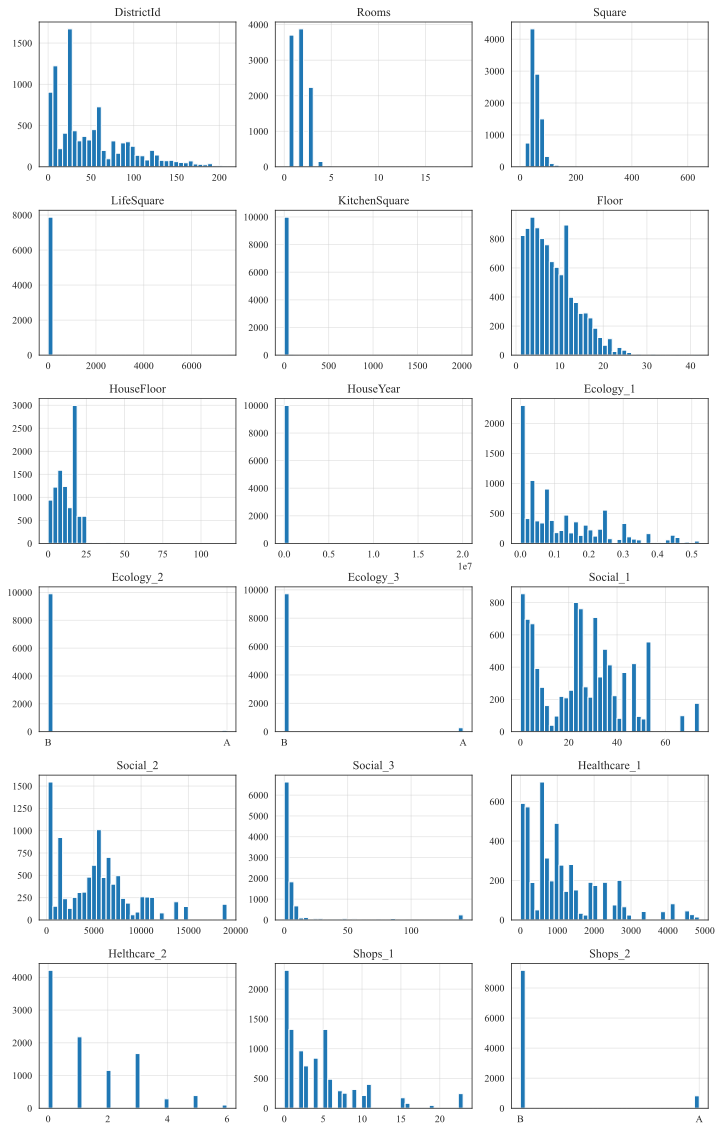

In [420]:
n_bins = int(1.72 * (data.shape[0])**(1/3))

fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(12,20))
ax = ax.flatten()
for ax_, feature in zip(ax, features_arr):
    ax_.hist(data[feature][data[feature].notna()], bins=n_bins)
    ax_.set_title(feature)
    ax_.grid(alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

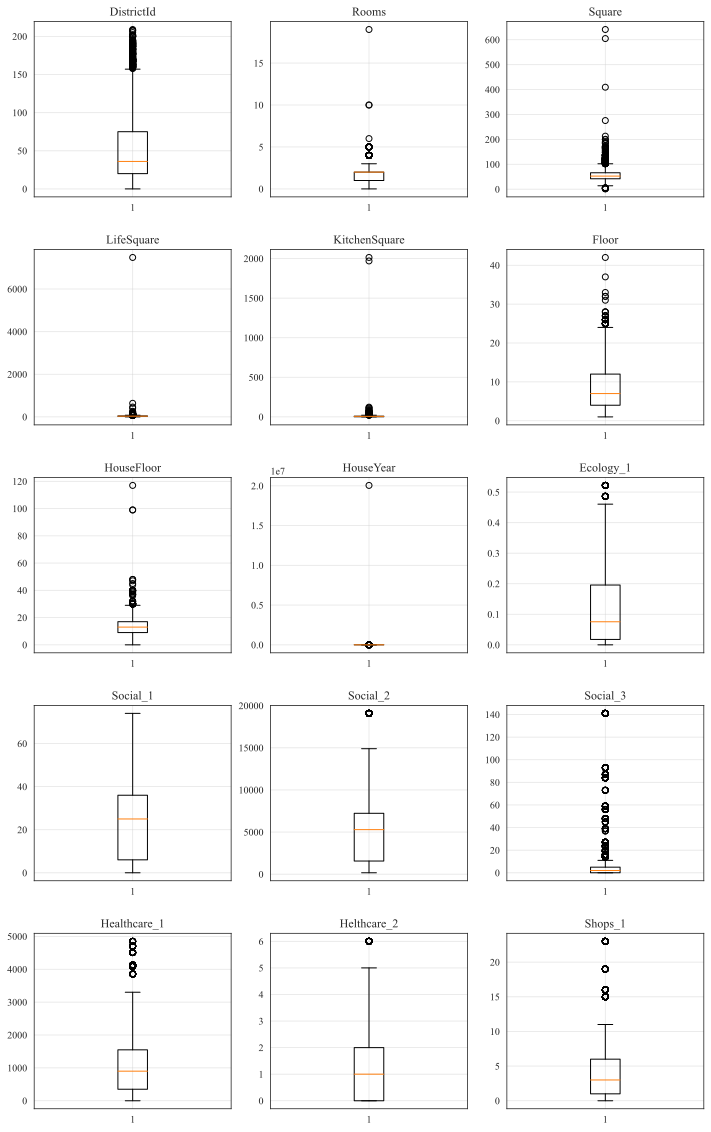

In [421]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(12,20))
ax = ax.flatten()
for ax_, feature in zip(ax, num_features_arr):
    if str(data[feature].dtype) != 'category':
        ax_.boxplot(data[feature][data[feature].notna()])
        ax_.set_title(feature)
        ax_.grid(alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

In [143]:
data.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315712    37.199596   
std     4859.01902     43.587592      0.839523     21.058718    86.241112   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774879    22.769833   
50%     8394.50000     36.000000      2.000000     52.513309    32.781261   
75%    12592.50000     75.000000      2.000000     65.900627    45.128803   
max    16798.00000    209.000000     19.000000    641.065186  7480.592285   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.561113      5.241148      6.776192  2.005003e+05      0.119026   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904419      1.319500   
std       17.532614   4006.799803     23.831875   1021.518982      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214139.218750  
std        4.806341   92872.304688  
min        0.000000   59174.777344  
25%        1.000000  153872.628906  
50%        3.000000  192269.648438  
75%        6.000000  249135.460938  
max       23.000000  633233.437500

Для того чтобы обработать выбросы, необходимо понять, какие значения могут принимать признаки. Для этого посмотрим на гистограммы и ящики с усами, чтобы рассмотреть эти выбросы. Будем считать, что в категориальных признаках и в Id нет выбросов, так как значения детерминированы. 

1. __Rooms__

    Наблюдаются выбросы, выходящие за интерквартильный размах. Напримерм, кол-во комнат 10, 19 с учетом небольшой жилой площади и 0. Поэтому заменим соответствующие значения на 0.9 квантиль и 1 комната соответственно.
    
    
2. __Square__

    Квартиры могут быть с большой площадью, но при этом должно быть либо очень много комнат, либо (обычно такое наблюдается) это последний этаж, то есть __Floor__ == __HouseFloor__. Также учтем, что стоимость больших квартиры, как правило, больше средней. Самые большие выбросы будем оценивать по району и ценам на квартиры в этих районах.
    
    
3. __LifeSquare__

    Во-первых, площадь должна быть не больше, чем вся площадь жилья. Поэтому там, где она больше, приравняем __Square__
    
    
4. __KitchenSquare__

    Аналогично предыдущему пункту, только приравниваем среднему. Там где __KitchenSquare__ == 0 приравняем тоже среднему.
    
    
5. __Floor__

    Этаж не может быть больше кол-ва этажей в доме.
    
    
6. __HouseFloor__

    Дом не может быть слишком большим. Либо же это небоскреб. Макимальный дом в нашем датасете имеет 117 этажей, что вполне нормально.
    

7. __HouseYear__

    Дом не может быть слишком старым. Также год постройки дома не может быть больше текущего года.
    
В остальных пунктах не совсем понятно сущность велечин показателей. Поэтому оставим их без изменений.

#### Оформим обработку выбросов в виде функции

Для разных режимов: __train__ и __test__, так как в одном указаны цены на жилье и этот факт используется, а во втором нет.

In [1036]:
def processing_outliners(df, mode='train'):
    """
    performs processing outliners in data
    """
    
    # Rooms
    df.loc[df.Rooms == 0, 'Rooms'] = 1
    df.loc[df.Rooms > 5, 'Rooms'] = df.Rooms.quantile(0.95)
    
    # Square
    data_outliers_square_value_max = df.Square.mean() + 1.5 * (df.Square.quantile(0.75) - df.Square.quantile(0.25))
    data_outliers_square_value_min = df.Square.mean() - 1.5 * (df.Square.quantile(0.75) - df.Square.quantile(0.25))
    if mode == 'train':
        index = data.loc[data['Square'] > data_outliers_square_value][df.Price < df.Price.mean()].index
        df.loc[index, 'Square'] = df.Square.mean()
    elif mode == 'test':
        pass
    df.loc[df.Square < 5, 'Square'] = data_outliers_square_value_min
    
    # LifeSquare
    df.loc[df.LifeSquare > df.Square, 'LifeSquare'] = df.loc[df.LifeSquare > df.Square, 'Square']
    
    # KitchenSquare
    df.loc[df.KitchenSquare > df.Square, 'KitchenSquare'] = df.KitchenSquare.mean()
    df.loc[df.KitchenSquare == 0, 'KitchenSquare'] = df.KitchenSquare.mean()
    
    # Floor
    df.loc[df.Floor > df.HouseFloor, 'Floor'] = df.loc[df.Floor > df.HouseFloor, 'HouseFloor']
    
    # HouseYear
    df.loc[df.HouseYear < 1910, 'HouseYear'] = df.HouseYear.quantile(0.25)
    df.loc[df.HouseYear > 2022, 'HouseYear'] = 2022

In [1037]:
processing_outliners(data, mode='train')

Посмотрим теперь на распределение данных

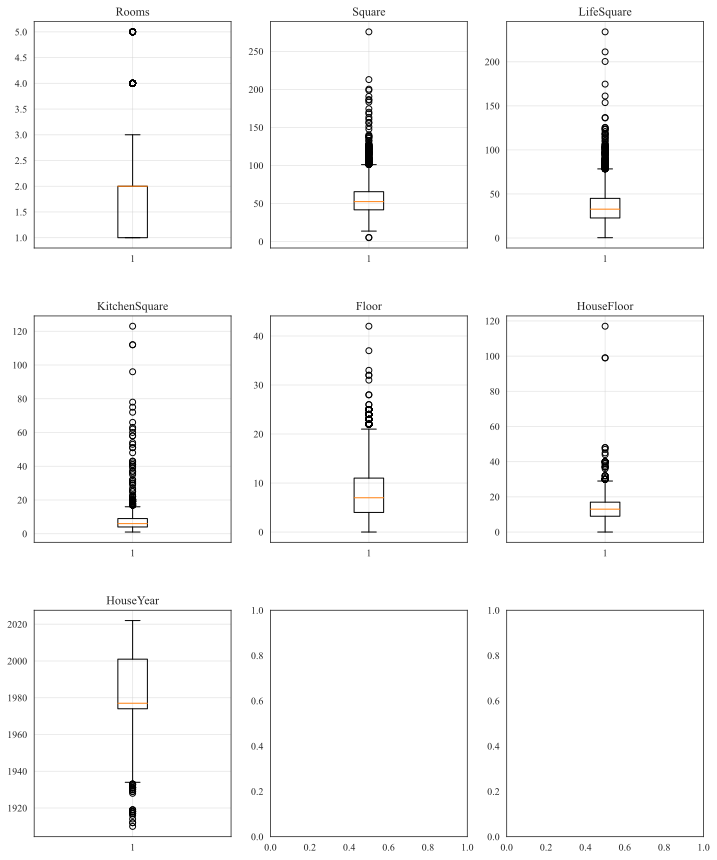

In [1038]:
columns = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear']
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,15))
ax = ax.flatten()
for ax_, feature in zip(ax, columns):
    if str(data[feature].dtype) != 'category':
        ax_.boxplot(data[feature][data[feature].notna()])
        ax_.set_title(feature)
        ax_.grid(alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

Как видно, выбросов стало меньше. Данные стали больше сконцентрированы около интерквартильного размаха.

### 3. Заполнение пропусков

Чтобы заполнить пропуски, надо разобраться, какие значения брать, среднее, минимальное, максимальное либо квантили? Для этого посмотрим на пропуски

1. __LifeSquare__

Тут все просто. Возьмем значения с __Square__

2. __HealthCare_1__

Посмотрим на второй показателей __Helthcare_2__. Возьмем его уникальные значения, где __HealthCare_1__ == Nan. И по ним в таблице вычислим среднее для __HealthCare_1__

In [1039]:
def fill_nan(df):
    """
    fills None values
    """
    df.loc[df.LifeSquare.isna(), 'LifeSquare'] = df.loc[df.LifeSquare.isna(), 'Square']
    healthcare_2_unique = df[df.Healthcare_1.isna()].Helthcare_2.unique()
    df.loc[df.Healthcare_1.isna(), 
         'Healthcare_1'] = df[df.Helthcare_2.isin(healthcare_2_unique)].Healthcare_1.mean()

In [1040]:
fill_nan(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     10000 non-null  float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  float32 
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   10000 non-null  float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

Как видно, теперь наш датасет занимает меньше места в оперативной памяти, почти не имеет выбросов и не имеет пропущенных значений. 

Хорошая работа __:)__

### 4. One-hot-encoding

In [1041]:
def one_hot_enc(data):
    """
    provides one-hot-encoding with cat feature
    """
    cat_features_df = pd.get_dummies(data[category_features_arr])
    num_features_df = data[num_features_arr]
    
    return pd.concat([num_features_df, cat_features_df], axis=1)

In [1042]:
features_df = one_hot_enc(data)

In [1043]:
features_df.sample(3)

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1036           6    2.0  66.708397   64.220276            1.0    8.0   
4754          46    2.0  59.783161   33.356819           11.0   13.0   
1598          27    1.0  38.813251   38.813251            1.0   17.0   

      HouseFloor  HouseYear  Ecology_1  Social_1  ...  Social_3  Healthcare_1  \
1036         8.0       2015   0.243205         5  ...         0    540.000000   
4754        14.0       2003   0.000000        47  ...         0   1145.000000   
1598        22.0       1977   0.211401         9  ...         0   1106.109253   

      Helthcare_2  Shops_1  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
1036            0        0            0            1            0   
4754            3        5            0            1            0   
1598            0        1            0            1            0   

      Ecology_3_B  Shops_2_A  Shops_2_B  
1036            1          0          1  
4754            1          0          1  
1598            1          0          1  

[3 rows x 21 columns]

### 5. Добавление новых признаков

Посмотрим на матрицу корреляции признаков. Будем смотреть на числовые признаки.

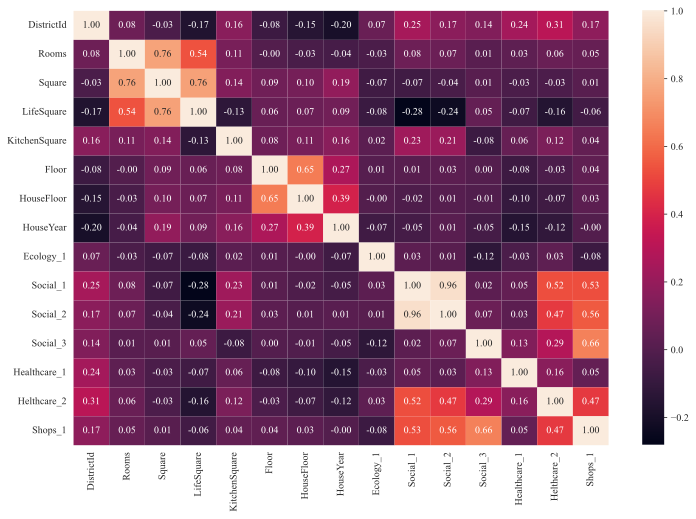

In [1044]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(features_df[num_features_arr].corr(), fmt='.2f', annot=True, ax=ax);

Коэффициенты корреляции характеризуются силой и значимостью.

Классификация коэффициентов корреляции по силе.

1. сильная	r > 0,70

2. средняя	0,50 < r < 0,69

3. умеренная	0,30 < r < 0,49

Наблюдается сильная корреляция в __LifeSquare__ и в __Square__; __Rooms__ и __Square__. Попробуем изменить эти признаки, с помощью нелинейного преобразования:

1. __LifeSquare__

__LifeSquare__ поделим на __Square__. Таким образом получим долю жилой зоны от всей площади.

2. __Rooms__

Возьмем __LifeSquare__ и поделим на __Rooms__. Получим среднюю площадь комнаты.

In [998]:
def unlinear_transforms(df):
    """
    does unlinear transforms on several features
    """

    df.LifeSquare = df.LifeSquare / df.Square
    df.Rooms = df.LifeSquare / df.Rooms
    df.rename(columns={'Rooms': 'Rooms_square'}, inplace=True)
    df.HouseYear = 2022 - df.HouseYear

In [1045]:
unlinear_transforms(features_df)

In [1046]:
features_df.describe()

DistrictId  Rooms_square        Square    LifeSquare  KitchenSquare  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean      50.400800      0.460969     55.762581      0.721165       6.270311   
std       43.587592      0.254170     18.312960      0.216550       4.811168   
min        0.000000      0.002000      5.129221      0.006001       1.000000   
25%       20.000000      0.285215     41.774879      0.575385       4.000000   
50%       36.000000      0.357918     52.513309      0.652871       6.000000   
75%       75.000000      0.547811     65.562862      1.000000       9.000000   
max      209.000000      1.000000    275.645294      1.000000     123.000000   

              Floor    HouseFloor     HouseYear     Ecology_1      Social_1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       7.700400     12.609400     37.127200      0.118858     24.687000   
std        5.304036      6.776192     18.417132      0.119026     17.532614   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.000000      9.000000     21.000000      0.017647      6.000000   
50%        7.000000     13.000000     45.000000      0.075424     25.000000   
75%       11.000000     17.000000     48.000000      0.195781     36.000000   
max       42.000000    117.000000    112.000000      0.521867     74.000000   

       ...      Social_3  Healthcare_1   Helthcare_2       Shops_1  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...      8.039200   1125.208740      1.319500      4.231300   
std    ...     23.831875    736.961670      1.493601      4.806341   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000    830.000000      0.000000      1.000000   
50%    ...      2.000000   1106.109253      1.000000      3.000000   
75%    ...      5.000000   1106.109253      2.000000      6.000000   
max    ...    141.000000   4849.000000      6.000000     23.000000   

        Ecology_2_A   Ecology_2_B   Ecology_3_A   Ecology_3_B     Shops_2_A  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.009700      0.990300      0.027500      0.972500      0.082500   
std        0.098015      0.098015      0.163543      0.163543      0.275139   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      0.000000      1.000000      0.000000   
50%        0.000000      1.000000      0.000000      1.000000      0.000000   
75%        0.000000      1.000000      0.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Shops_2_B  
count  10000.000000  
mean       0.917500  
std        0.275139  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 21 columns]

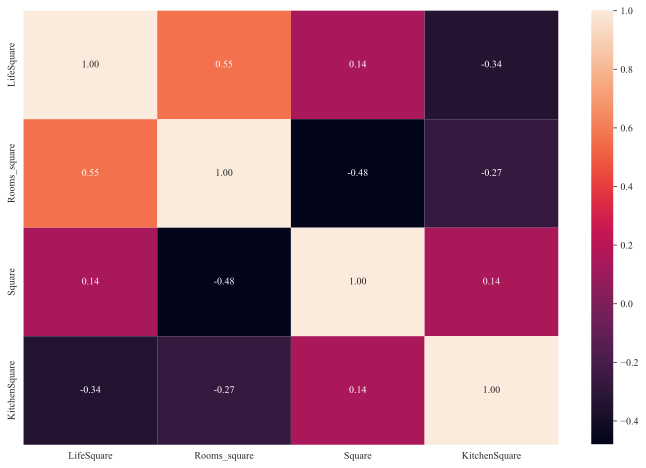

In [1047]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(features_df[['LifeSquare', 'Rooms_square', 'Square', 'KitchenSquare']].corr(), fmt='.2f', annot=True, ax=ax);

Как видно из матрицы корреляций, данные стали меньше скоррелированы, чего мы и добивались.

### 6. Сохранение обработанного датасета

In [1048]:
pd.concat([features_df, data[target_arr]], axis=1).to_csv('clear_data.csv')

## <center>II. Model selection и обучение<center>
    
1. Разделим датасет на обучающую и валидационную выборку с помощью __train_test_split__
2. Применим стандартизацию к данным с помощью __StandardScaler__
3. Проверим __accuracy__ на разных моделях с учетом поисков параметров по сетке __GridSearchCV__
4. Попробуем пустить в ход тяжелую артиллерию — композицию алгоритмов: __baging__ и __boosting__ 

In [1049]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv('clear_data.csv', index_col=0)
df.sample(3)

DistrictId  Rooms_square     Square  LifeSquare  KitchenSquare  Floor  \
8095          84      0.224762  54.760970    0.674286            5.0    5.0   
294            1      1.000000  41.848343    1.000000            1.0   16.0   
9437           1      1.000000  38.197060    1.000000            1.0   14.0   

      HouseFloor  HouseYear  Ecology_1  Social_1  ...  Healthcare_1  \
8095         5.0         60   0.149666        22  ...     4087.0000   
294         17.0         45   0.007122         1  ...     1106.1093   
9437        17.0         45   0.007122         1  ...     1106.1093   

      Helthcare_2  Shops_1  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
8095            4        1            0            1            0   
294             0        1            0            1            0   
9437            0        1            0            1            0   

      Ecology_3_B  Shops_2_A  Shops_2_B      Price  
8095            1          0          1  249667.05  
294             1          0          1  143414.11  
9437            1          0          1  161717.19  

[3 rows x 22 columns]

### 1. Деление датасета на тестовую и валидационные выборки

In [1050]:
seed = 42

X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [1051]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True)

### 2. Стандартизация данных

In [1052]:
scaler = StandardScaler()
X_train_trans = scaler.fit_transform(X_train)
X_val_trans = scaler.transform(X_val)

### 3. Обучение простых моделей

In [1053]:
def train(X, y, X_, y_, model, model_name):
    """pipeline of training"""
    
    model.fit(X, y)
    probs_train = model.predict(X)
    probs_val = model.predict(X_)
    print(f"""Accuracy | model {model_name}\n\tTrain\nr^2: {r2(y, probs_train)}\nRMSE: {np.sqrt(mse(y, probs_train))}\n
    \tVal\nr^2: {r2(y_, probs_val)}\nRMSE: {np.sqrt(mse(y_, probs_val))}\n""")
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax1, ax2 = ax.flatten()
    sns.scatterplot(probs_train, y, ax=ax1)
    ax1.grid(alpha=0.5)
    ax1.set_xlabel('prediction', fontsize=15)
    ax1.set_ylabel('true', fontsize=15)
    ax1.set_title('Train');
    
    sns.scatterplot(probs_val, y_, ax=ax2)
    ax2.grid(alpha=0.5)
    ax2.set_xlabel('prediction', fontsize=15)
    ax2.set_ylabel('true', fontsize=15)
    ax2.set_title('Val');
    
    plt.subplots_adjust(wspace=0.3)

Accuracy | model LinearRegression
	Train
r^2: 0.5558656507559545
RMSE: 61755.35687185288

    	Val
r^2: 0.5516188013481031
RMSE: 62724.095537705696



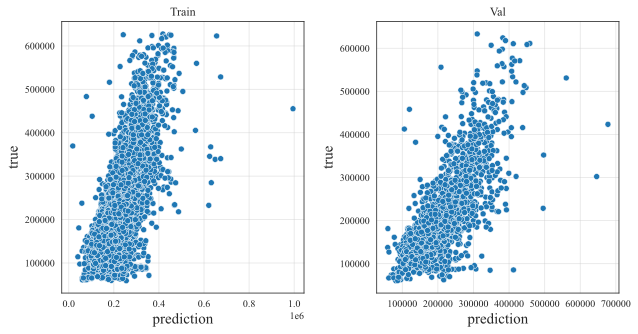

In [1054]:
# LinearRegression
train(X_train_trans, y_train, X_val_trans, y_val,
     LinearRegression(), 'LinearRegression')

Accuracy | model KNeighborsRegressor
	Train
r^2: 0.7829670594982309
RMSE: 43169.82435882587

    	Val
r^2: 0.6742007300867796
RMSE: 53466.99352529335



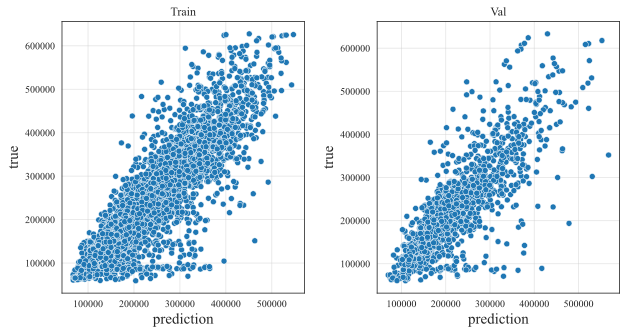

In [1055]:
# KNeighborsRegressor
train(X_train_trans, y_train, X_val_trans, y_val,
     KNeighborsRegressor(metric='euclidean'), 'KNeighborsRegressor')

Как видно, точность предсказаний на валидационной выборке слишком маленькая.

### 4. Baging и Boosting

In [1056]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

Accuracy | model RandomForest
	Train
r^2: 0.9645788052778642
RMSE: 17440.103466112003

    	Val
r^2: 0.7509129893820145
RMSE: 46750.49903672316



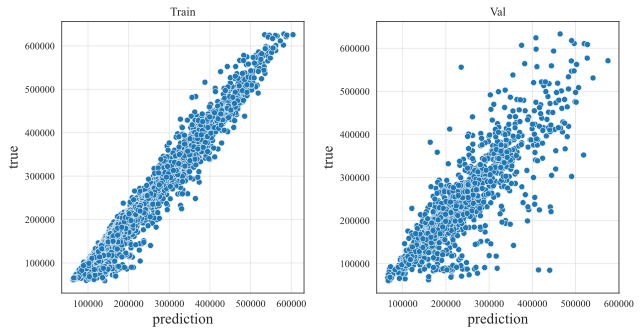

In [1057]:
# RandomForestRegressor
train(X_train_trans, y_train, X_val_trans, y_val,
     RandomForestRegressor(n_estimators=100, random_state=seed, criterion='mse'), 'RandomForest')

Accuracy | model XGBoost
	Train
r^2: 0.8763027451249873
RMSE: 32590.984917644982

    	Val
r^2: 0.7541674696106991
RMSE: 46444.08236062336



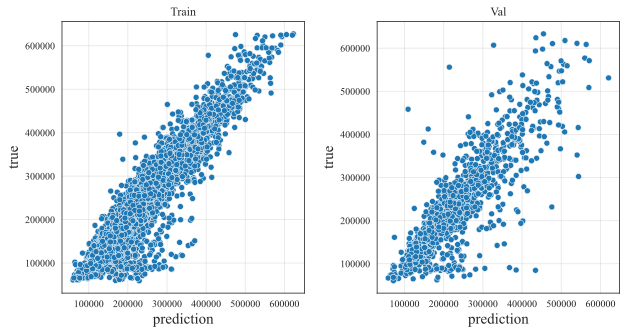

In [1058]:
# xgboost
xgb_r = xg.XGBRegressor(max_depth=5, n_estimators=50)
train(X_train_trans, y_train, X_val_trans, y_val,
     xgb_r, 'XGBoost')

Лучшей моделью по оценке точности на валидационной выборке оказалась XGBRegressor

In [1059]:
best_model = xgb_r

## <center>III. Предсказания на тестовых данных <center>

In [1060]:
test_df = pd.read_csv('test.csv')

In [1061]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [1062]:
test_df.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   5000.000000  5000.000000  5000.000000  5000.000000  3959.000000   
mean    8412.595400    51.279200     1.910000    56.449500    36.158810   
std     4832.674037    44.179466     0.838594    19.092787    17.825287   
min        1.000000     0.000000     0.000000     1.378543     0.333490   
25%     4221.750000    21.000000     1.000000    41.906231    23.092026   
50%     8320.500000    37.000000     2.000000    52.921340    32.925087   
75%    12598.250000    77.000000     2.000000    66.285129    45.174091   
max    16795.000000   212.000000    17.000000   223.453689   303.071094   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean        5.976800     8.632000    12.601000  1984.392600     0.119874   
std         9.950018     5.483228     6.789213    18.573149     0.120070   
min         0.000000     1.000000     0.000000  1908.000000     0.000000   
25%         1.000000     4.000000     9.000000  1973.000000     0.019509   
50%         6.000000     7.000000    12.000000  1977.000000     0.072158   
75%         9.000000    12.000000    17.000000  2000.000000     0.195781   
max       620.000000    78.000000    99.000000  2020.000000     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  5000.000000   5000.000000  5000.000000   2623.000000   5000.00000   
mean     24.933800   5406.900000     8.262600   1146.657263      1.31940   
std      17.532202   4026.614773    23.863762   1044.744231      1.47994   
min       0.000000    168.000000     0.000000      0.000000      0.00000   
25%       6.000000   1564.000000     0.000000    325.000000      0.00000   
50%      25.000000   5285.000000     2.000000    900.000000      1.00000   
75%      36.000000   7287.000000     5.000000   1548.000000      2.00000   
max      74.000000  19083.000000   141.000000   4849.000000      6.00000   

           Shops_1  
count  5000.000000  
mean      4.242800  
std       4.777365  
min       0.000000  
25%       1.000000  
50%       3.000000  
75%       6.000000  
max      23.000000

In [1063]:
change_data_type(test_df)
processing_outliners(test_df, mode='test')
fill_nan(test_df)
test_df_ = one_hot_enc(test_df)
unlinear_transforms(test_df_)

Memory usage of dataframe: 0.72 Mb
Memory usage after optimization is: 0.22 Mb
Decreased by 70.3


In [1064]:
test_df_.describe()

DistrictId  Rooms_square       Square   LifeSquare  KitchenSquare  \
count  5000.000000   5000.000000  5000.000000  5000.000000    5000.000000   
mean     51.279200      0.453596    56.470100     0.719063       6.212900   
std      44.179466      0.248728    19.043917     0.215709       4.363755   
min       0.000000      0.000545     5.100671     0.002725       1.000000   
25%      21.000000      0.284810    41.906230     0.577256       5.000000   
50%      37.000000      0.350802    52.921339     0.651279       6.000000   
75%      77.000000      0.541116    66.285130     1.000000       9.000000   
max     212.000000      1.000000   223.453690     1.000000     112.000000   

             Floor   HouseFloor    HouseYear    Ecology_1     Social_1  ...  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  ...   
mean      7.838000    12.601000    37.581600     0.119874    24.933800  ...   
std       5.454978     6.789167    18.512393     0.120070    17.532202  ...   
min       0.000000     0.000000     2.000000     0.000000     0.000000  ...   
25%       4.000000     9.000000    22.000000     0.019509     6.000000  ...   
50%       7.000000    12.000000    45.000000     0.072158    25.000000  ...   
75%      11.000000    17.000000    49.000000     0.195781    36.000000  ...   
max      46.000000    99.000000   112.000000     0.521867    74.000000  ...   

          Social_3  Healthcare_1  Helthcare_2      Shops_1  Ecology_2_A  \
count  5000.000000   5000.000000   5000.00000  5000.000000  5000.000000   
mean      8.262600   1129.316650      1.31940     4.242800     0.009600   
std      23.863762    756.844604      1.47994     4.777365     0.097518   
min       0.000000      0.000000      0.00000     0.000000     0.000000   
25%       0.000000    810.000000      0.00000     1.000000     0.000000   
50%       2.000000   1110.239502      1.00000     3.000000     0.000000   
75%       5.000000   1110.239502      2.00000     6.000000     0.000000   
max     141.000000   4849.000000      6.00000    23.000000     1.000000   

       Ecology_2_B  Ecology_3_A  Ecology_3_B    Shops_2_A    Shops_2_B  
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  
mean      0.990400     0.029800     0.970200     0.082400     0.917600  
std       0.097518     0.170052     0.170052     0.275001     0.275001  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     1.000000     0.000000     1.000000  
50%       1.000000     0.000000     1.000000     0.000000     1.000000  
75%       1.000000     0.000000     1.000000     0.000000     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 21 columns]

In [1066]:
X = scaler.transform(test_df_)

In [1067]:
X = np.array(new_test_df)
predicts = best_model.predict(X)
predicts

array([303833.25, 332228.3 , 279211.38, ..., 290573.2 , 328625.9 ,
       283571.8 ], dtype=float32)

### Вот и все! Можно отправлять результаты на Kagle